# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


# Utilizing positioning data

The accompanying dataset contains sensors data from a positioning system, attached to a Leverkusen junior soccer player. The purpose is to collect informatin about each player and the team for player and team development purposes. The data contains sensor readings

 - Lateral accelarations from Inertial Measuremnt Unit (IMU)
 - Angular accelerations from IMU
 - Latitude and longitude from Global Navigation Satellite System (GNSS)
 - And some other sensor and calculated data

Some of the last columns do not contain any values. And some time in the beginning the GNSS positioning is not working, and therefore the latitude and longitude is available only after some time. 

Each row contains a sensor reading during a specific time. The time interval between the samples (=rows) is 1/100 s. 

It is easiest to read complex CSV-files with a sophisticated pandas `read_csv()` -function.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# You can try to use Seaborn. It changes the layout of the graphics, use it if you like
#import seaborn as sns
#sns.set()

## Read the data

1. Examine the data in the editor, to seet what it's structure is (CSV:s are sometimes rather badly formed, in this case it is quite Ok though)
1. Read the data from the file `101666_1678179706_4556.csv` to pandas dataframe called as `D_all`. Notice that there are a few first lines which are not in CSV form. They must be skipped.
2. Check the first five rows of the data to see that you have correctly read it.
3. Assign the number of rows of the whole dataset to varible `n` and number of columns to variable `p`

**TIP**: It is a good strategy to place the data reading part (which takes a lot of time and resources) in a separate cell, and read it only once, and the work with it with repetitive tasks in the next cells.


In [3]:
# Read the data here to D_all
# YOUR CODE HERE

# 2. Skipped 3 rows as first 3 lines are not in csv format
D_all = pd.read_csv('101666_1678179706_4556.csv', skipinitialspace=True, skiprows=3)

# 3. Checking first five rows
D_all.head()

,Acceleration.forward,Acceleration.side,Acceleration.up,Rotation.roll,Rotation.pitch,Rotation.yaw,RawPlayerLoad,SmoothedPlayerLoad,imuAcceleration.forward,imuAcceleration.side,...,Longitude,Odometer,RawVelocity,SmoothedVelocity,GNSS.LPS.Acceleration,MetabolicPower,GNSS.Fix,GNSS.Strength,GNSS.HDOP,HeartRate
0,-0.569184,0.520784,0.391072,68.564000,-53.375,8.540,0.457031,0.299429,-0.568404,0.512275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,-0.555148,0.438504,0.498520,55.754000,-32.879,-17.385,0.221680,0.308917,-0.551497,0.418696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,-0.569668,0.408012,0.530948,47.702000,-20.008,-41.358,0.116211,0.318291,-0.561481,0.378393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-0.600644,0.494648,0.530464,34.465000,-7.198,-59.597,0.085938,0.327529,-0.586356,0.456580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,-0.642268,0.500940,0.577896,24.644001,-4.880,-80.032,0.070312,0.336599,-0.619121,0.451519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# 4. Assigning number of rows to n and number of columns to p
n = D_all.shape[0]
p = D_all.shape[1]

print("Number of rows:", n)
print("Number of columns:", p)

Number of rows: 455611
Number of columns: 26


In [5]:
# Then make the further analysis of the data here. D_all is still valid, since it was defined in the previous cell
# YOUR CODE HERE
D_all.describe()

,Acceleration.forward,Acceleration.side,Acceleration.up,Rotation.roll,Rotation.pitch,Rotation.yaw,RawPlayerLoad,SmoothedPlayerLoad,imuAcceleration.forward,imuAcceleration.side,...,Longitude,Odometer,RawVelocity,SmoothedVelocity,GNSS.LPS.Acceleration,MetabolicPower,GNSS.Fix,GNSS.Strength,GNSS.HDOP,HeartRate
count,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,...,28834.000000,28834.000000,28834.000000,28834.000000,2.883400e+04,28834.000000,28834.000000,28834.000000,28834.000000,455611.0
mean,-0.406693,0.042882,0.702822,0.403699,-0.542466,0.493093,0.078617,0.312630,-0.005387,-0.001300,...,6.999042,1242.720728,0.819955,0.802380,4.109615e-05,3.770969,15.021329,4.863876,0.737691,0.0
std,0.414722,0.329580,0.646886,46.404008,50.671921,70.492233,0.203868,0.472539,0.203405,0.235256,...,0.000217,712.472186,0.879645,0.868651,4.486178e-01,5.053830,1.543886,1.691259,0.199608,0.0
min,-14.844764,-15.317147,-5.455648,-1005.219000,-1988.478000,-1998.787000,0.000000,0.000000,-9.687399,-14.046674,...,6.998607,0.000000,0.000500,0.000000,-3.146602e+00,-0.000012,5.000000,0.000000,0.610000,0.0
25%,-0.732292,-0.099704,0.162140,-7.442000,-7.869000,-10.065001,0.003418,0.010249,-0.027591,-0.037511,...,6.998914,660.525250,0.078500,0.079256,-1.433313e-01,0.353228,14.000000,4.000000,0.670000,0.0
50%,-0.298144,0.038236,0.892980,0.000000,-0.061000,0.061000,0.020996,0.132820,0.000073,0.001297,...,6.999038,1158.871500,0.596500,0.575096,-5.043686e-07,2.415577,15.000000,5.000000,0.700000,0.0
75%,-0.157784,0.201828,0.986876,7.259000,5.978000,11.834001,0.074219,0.339541,0.031784,0.036223,...,6.999136,1979.485100,1.236500,1.234441,1.016305e-01,5.312170,16.000000,6.000000,0.750000,0.0
max,11.735548,9.830040,15.799212,1998.360000,2000.983000,1998.787000,9.613281,4.342911,13.028172,14.516465,...,7.000157,2451.855200,6.681500,6.464076,3.825590e+00,73.006290,17.000000,11.000000,5.310000,0.0


In [6]:
D_all.mean()

Acceleration.forward         -0.406693
Acceleration.side             0.042882
Acceleration.up               0.702822
Rotation.roll                 0.403699
Rotation.pitch               -0.542466
Rotation.yaw                  0.493093
RawPlayerLoad                 0.078617
SmoothedPlayerLoad            0.312630
imuAcceleration.forward      -0.005387
imuAcceleration.side         -0.001300
imuAcceleration.up            0.003005
imuOrientation.forward        0.402208
imuOrientation.side           0.045359
imuOrientation.up             0.703764
Facing                       71.283088
Latitude                     51.036827
Longitude                     6.999042
Odometer                   1242.720728
RawVelocity                   0.819955
SmoothedVelocity              0.802380
GNSS.LPS.Acceleration         0.000041
MetabolicPower                3.770969
GNSS.Fix                     15.021329
GNSS.Strength                 4.863876
GNSS.HDOP                     0.737691
HeartRate                

In [7]:
if 'D_all' not in globals():
    print("D_all not found! Please read the data to D_all.")
elif type(D_all)!=pd.DataFrame:
    print(f"D_all is not a pandas data frame", type(D_all))
elif 'n' not in globals():
    print("n not found! Please assign the number of rows in D_all to n.")
elif 'p' not in globals():
    print("p not found! Please assign the number of columns in D_all to p")
else:
    print("No errors found this far. Your code may work.")


No errors found this far. Your code may work.


## Remove rows with missing coordinate data

1. Study the data with the `describe()` -function. How many values there are in each column. Assign in variable `nL`, How many rows have data ain `Longitude` -column.
2. Drop each row, where the Longitude-value is missing. and assign the result to new data-frame `D`

In [15]:
# YOUR CODE HERE
D_all.describe()

,Acceleration.forward,Acceleration.side,Acceleration.up,Rotation.roll,Rotation.pitch,Rotation.yaw,RawPlayerLoad,SmoothedPlayerLoad,imuAcceleration.forward,imuAcceleration.side,...,Longitude,Odometer,RawVelocity,SmoothedVelocity,GNSS.LPS.Acceleration,MetabolicPower,GNSS.Fix,GNSS.Strength,GNSS.HDOP,HeartRate
count,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,455611.000000,...,28834.000000,28834.000000,28834.000000,28834.000000,2.883400e+04,28834.000000,28834.000000,28834.000000,28834.000000,455611.0
mean,-0.406693,0.042882,0.702822,0.403699,-0.542466,0.493093,0.078617,0.312630,-0.005387,-0.001300,...,6.999042,1242.720728,0.819955,0.802380,4.109615e-05,3.770969,15.021329,4.863876,0.737691,0.0
std,0.414722,0.329580,0.646886,46.404008,50.671921,70.492233,0.203868,0.472539,0.203405,0.235256,...,0.000217,712.472186,0.879645,0.868651,4.486178e-01,5.053830,1.543886,1.691259,0.199608,0.0
min,-14.844764,-15.317147,-5.455648,-1005.219000,-1988.478000,-1998.787000,0.000000,0.000000,-9.687399,-14.046674,...,6.998607,0.000000,0.000500,0.000000,-3.146602e+00,-0.000012,5.000000,0.000000,0.610000,0.0
25%,-0.732292,-0.099704,0.162140,-7.442000,-7.869000,-10.065001,0.003418,0.010249,-0.027591,-0.037511,...,6.998914,660.525250,0.078500,0.079256,-1.433313e-01,0.353228,14.000000,4.000000,0.670000,0.0
50%,-0.298144,0.038236,0.892980,0.000000,-0.061000,0.061000,0.020996,0.132820,0.000073,0.001297,...,6.999038,1158.871500,0.596500,0.575096,-5.043686e-07,2.415577,15.000000,5.000000,0.700000,0.0
75%,-0.157784,0.201828,0.986876,7.259000,5.978000,11.834001,0.074219,0.339541,0.031784,0.036223,...,6.999136,1979.485100,1.236500,1.234441,1.016305e-01,5.312170,16.000000,6.000000,0.750000,0.0
max,11.735548,9.830040,15.799212,1998.360000,2000.983000,1998.787000,9.613281,4.342911,13.028172,14.516465,...,7.000157,2451.855200,6.681500,6.464076,3.825590e+00,73.006290,17.000000,11.000000,5.310000,0.0


In [43]:
D_all['Longitude']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
455606   NaN
455607   NaN
455608   NaN
455609   NaN
455610   NaN
Name: Longitude, Length: 455611, dtype: float64

In [33]:
D_all[D_all.Longitude.isna()]

,Acceleration.forward,Acceleration.side,Acceleration.up,Rotation.roll,Rotation.pitch,Rotation.yaw,RawPlayerLoad,SmoothedPlayerLoad,imuAcceleration.forward,imuAcceleration.side,...,Longitude,Odometer,RawVelocity,SmoothedVelocity,GNSS.LPS.Acceleration,MetabolicPower,GNSS.Fix,GNSS.Strength,GNSS.HDOP,HeartRate
0,-0.569184,0.520784,0.391072,68.564000,-53.375000,8.540,0.457031,0.299429,-0.568404,0.512275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,-0.555148,0.438504,0.498520,55.754000,-32.879000,-17.385,0.221680,0.308917,-0.551497,0.418696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,-0.569668,0.408012,0.530948,47.702000,-20.008000,-41.358,0.116211,0.318291,-0.561481,0.378393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-0.600644,0.494648,0.530464,34.465000,-7.198000,-59.597,0.085938,0.327529,-0.586356,0.456580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,-0.642268,0.500940,0.577896,24.644001,-4.880000,-80.032,0.070312,0.336599,-0.619121,0.451519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455606,-0.012100,0.003388,1.154824,-4.819000,15.006001,4.209,0.225586,1.312105,0.057842,0.050718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
455607,-0.026136,-0.026620,0.982036,-0.244000,-0.122000,0.305,0.074707,1.271817,0.032771,0.013454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
455608,0.015972,-0.004356,1.031888,0.305000,0.915000,0.244,0.026367,1.230705,0.076418,0.036884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
455609,-0.031944,-0.037268,1.024628,1.708000,-1.403000,-0.366,0.035645,1.189062,0.027420,0.003409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [34]:
D_all[D_all.Longitude.notna()]

,Acceleration.forward,Acceleration.side,Acceleration.up,Rotation.roll,Rotation.pitch,Rotation.yaw,RawPlayerLoad,SmoothedPlayerLoad,imuAcceleration.forward,imuAcceleration.side,...,Longitude,Odometer,RawVelocity,SmoothedVelocity,GNSS.LPS.Acceleration,MetabolicPower,GNSS.Fix,GNSS.Strength,GNSS.HDOP,HeartRate
28650,-0.563860,-0.143748,0.559504,35.441000,5.612,-13.359000,0.012207,0.093665,0.003774,0.008703,...,6.999294,0.0000,0.0005,0.000000,0.000000,2.593724e-07,5.0,3.0,5.31,0
28660,-0.570152,-0.237160,0.493680,-7.930000,6.954,0.915000,0.010742,0.097655,-0.030356,-0.090231,...,6.999294,0.0000,0.0005,0.000000,0.000000,1.504454e-05,5.0,3.0,5.31,0
28670,-0.728904,-0.326700,0.571120,-46.177002,8.540,15.067000,0.032227,0.103304,-0.049545,-0.106508,...,6.999293,0.0000,0.0005,0.000000,0.000000,2.954328e-04,5.0,3.0,5.31,0
28680,-0.954448,-0.239580,0.798116,-30.439001,-6.832,24.644001,0.055176,0.109390,-0.014362,0.092467,...,6.999293,0.0000,0.0005,0.000000,0.000000,2.539223e-03,5.0,3.0,5.31,0
28690,-0.895400,-0.133584,0.806828,15.921000,-17.629,9.638001,0.011719,0.114661,0.004016,0.136911,...,6.999293,0.0000,0.0785,0.002173,0.000436,1.203840e-02,5.0,3.0,5.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316940,-0.150040,-0.000484,0.815540,13.115000,-24.278,21.167000,0.031250,0.376359,0.125009,-0.024292,...,7.000151,2451.4412,0.0875,0.174646,0.055712,7.580766e-01,11.0,0.0,0.91,0
316950,-1.069640,0.894432,2.122340,43.127000,-17.934,38.369000,0.478027,0.408397,-0.358395,0.608660,...,7.000152,2451.4412,0.0965,0.174605,0.057231,7.512999e-01,11.0,0.0,0.91,0
317080,-0.089056,0.336380,0.874588,15.189000,-10.187,-45.140000,0.053711,0.349321,0.039920,0.013444,...,7.000155,2451.4412,0.1115,0.004046,-0.096871,6.878912e-02,12.0,0.0,0.90,0
317090,-0.101156,0.220220,0.724064,11.407001,-8.174,-12.627000,0.043457,0.324557,0.020141,-0.058214,...,7.000155,2451.8552,0.2225,0.011025,-0.119488,6.572984e-02,12.0,0.0,0.90,0


In [8]:
nL = D_all[D_all.Longitude.notna()].shape[0]

In [9]:
print("Total Rows:",n)
print("Total Rows that has Longitude values:",nL)

Total Rows: 455611
Total Rows that has Longitude values: 28834


In [10]:
# New dataframe D where all the Longitude data are present
D = D_all[D_all.Longitude.notna()]

In [11]:
D['Longitude']

28650     6.999294
28660     6.999294
28670     6.999293
28680     6.999293
28690     6.999293
            ...   
316940    7.000151
316950    7.000152
317080    7.000155
317090    7.000155
317100    7.000154
Name: Longitude, Length: 28834, dtype: float64

In [12]:
errorfound=False
Ncorrect=0
if ('D' not in globals()) or ('nL' not in globals()):
    print("D or nL is not found! Please Store the reduced data frame as D, and number of values in nL")
    errorfound=True
if not errorfound:
    print("No errrors found this far, your code may work :)")


No errrors found this far, your code may work :)


In [13]:
D.columns[8:11]
t=np.linspace(0,10,1000)

#### Plot the data
1. Study the column names, by printing the `D.columns` variable
1. Plot the three accelerations: `Acceleration.forward`, `Acceleration.side`, and `Acceleration.up` between rows (=samples) between 0-500 in the same figure. Use the `D.plot()` and assign the resulting figure to the variable called `fig`, as follows: `fig = D.plot(...`
2. Define the label for y-axis. You can use LaTeX strings as follows `'Acceleration $\cdot 10 m/s^2$' `. The part between dollar signs is interpreted as mathematical expression.
3. Define also the label for x-axis. It is the time in centiseconds or 10 ms.

**TIP**: It is easiest to plot Pandas dataframes by just using the build in `plot()` function of the dataframe object. Study its properties by writing `D.plot` and then hitting the `Shift-TAB` button combination. You should see the documentation of print

In [14]:
# YOUR CODE HERE
# 1. Printing Column Names
print(D.columns)

Index(['Acceleration.forward', 'Acceleration.side', 'Acceleration.up',
       'Rotation.roll', 'Rotation.pitch', 'Rotation.yaw', 'RawPlayerLoad',
       'SmoothedPlayerLoad', 'imuAcceleration.forward', 'imuAcceleration.side',
       'imuAcceleration.up', 'imuOrientation.forward', 'imuOrientation.side',
       'imuOrientation.up', 'Facing', 'Latitude', 'Longitude', 'Odometer',
       'RawVelocity', 'SmoothedVelocity', 'GNSS.LPS.Acceleration',
       'MetabolicPower', 'GNSS.Fix', 'GNSS.Strength', 'GNSS.HDOP',
       'HeartRate'],
      dtype='object')


In [15]:
# new_D contains only the three required columns and taken the first 500 rows only
new_D = D[['Acceleration.forward', 'Acceleration.side', 'Acceleration.up']]
new_D = new_D[0:500]
new_D.shape

(500, 3)

Text(0.5, 0, 'Time in Centiseconds')

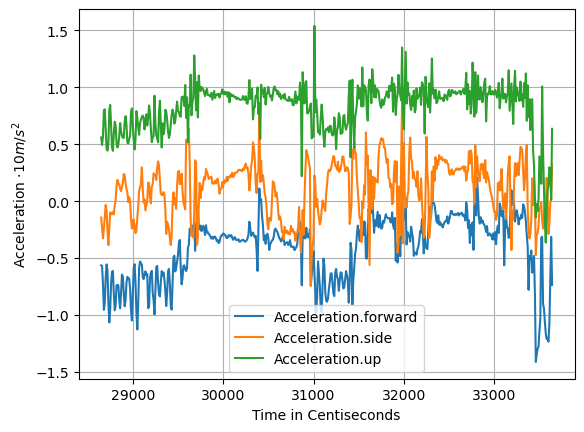

In [16]:
fig = new_D.plot()
fig.grid()

# 3. Setting y label
fig.set_ylabel('Acceleration $\cdot 10 m/s^2$')

# 4. Setting x label
fig.set_xlabel('Time in Centiseconds')

In [17]:
errorfound=False
Ncorrect=0
if 'fig' not in globals():
    print("fig not found! Please plot the figure, and store it to variable fig.")
    errorfound=True
else:
    Ncorrect+=1
    if fig.axes.get_xlabel().startswith('Time'):
        Ncorrect +=1
    else:
        print("X-axis label not set or not correct. Please recheck.")
        errorfound=True
    if fig.axes.get_ylabel().startswith('Acce'):
        Ncorrect+=1
    else:
        print("Y-axis label not set or not correct. Please recheck.")
        errorfound=True
if not errorfound:
    print("No errrors found this far, your code may work :)")
         

No errrors found this far, your code may work :)


## Scatterplot
1. Make scatterplot of two columns `Latitude` and `Longitude` of the data between rows 0:500, and store the figure as `fig_scatter`. Make sure that Latitude is in the x-axis.

In [18]:
# YOUR CODE HERE
new_D2 = D[['Latitude', 'Longitude']]
new_D2 = new_D2[0:500]
new_D2.shape

(500, 2)

In [19]:
print(new_D2.Latitude.mean())
print(new_D2.Longitude.mean())

51.037094406
6.9992779118


In [20]:
print(new_D2.Latitude.max())
print(new_D2.Latitude.min())

51.037125
51.0370133


In [21]:
print(new_D2.Longitude.max())
print(new_D2.Longitude.min())

6.9993135
6.999236


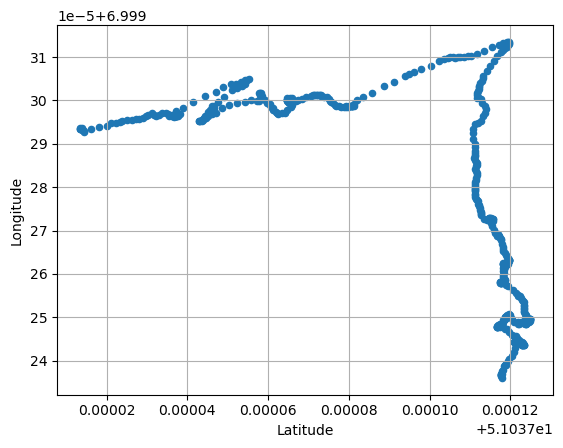

In [23]:
fig_scatter = new_D2.plot.scatter(x='Latitude', y='Longitude')
fig_scatter.grid()

In [24]:
errorfound=False
Ncorrect=0
if 'fig_scatter' not in globals():
    print("fig_scatter not found! Please plot the figure, and store it to variable fig.")
    errorfound=True
else:
    if fig_scatter.axes.get_xlabel().startswith('Lati'):
        Ncorrect +=1
    else:
        print("There is something wrong, plese recheckd")
        errorfound=True
if not errorfound:
    print("No errrors found this far, your code may work :)")
         

No errrors found this far, your code may work :)
